#  TechnoHacks: Data Science

## Task1: Social media sentiment analysis

### Use a dataset of tweets or Facebook posts and perform sentiment analysis to determine the overall sentiment of the posts

# Importing Libraries

In [1]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings(action='ignore')

# nltk
import nltk
nltk.download('stopwords')

## Preprocessing libraries
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# For Model training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC              # a variant of SVC optimized for large datasets

# Metrics for accuracy
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

[nltk_data] Downloading package stopwords to C:\Users\MD
[nltk_data]     KAMALUDDIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Reading our dataset
df = pd.read_csv('Tweets.csv')
print("Total Records:", df.shape)
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# EDA

In [3]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

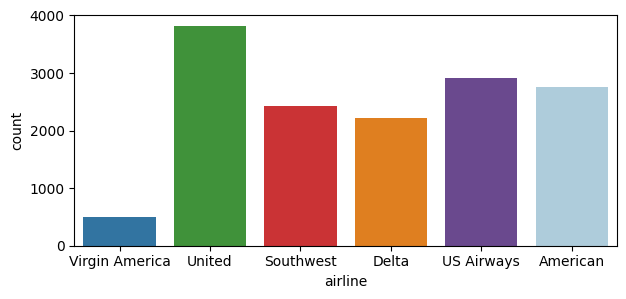

In [4]:
# Checking the distribution of airlines
plt.figure(figsize=(7,3))
sns.countplot(data=df,x='airline', palette=['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#a6cee3'])
plt.show()

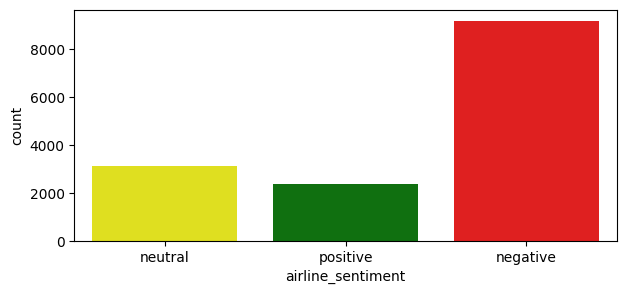

In [5]:
# Seeing the distribution of positive and negative tweet reviews in target column
plt.figure(figsize=(7,3))
sns.countplot(data=df,x='airline_sentiment',palette=['yellow', 'green','red'])
plt.show()

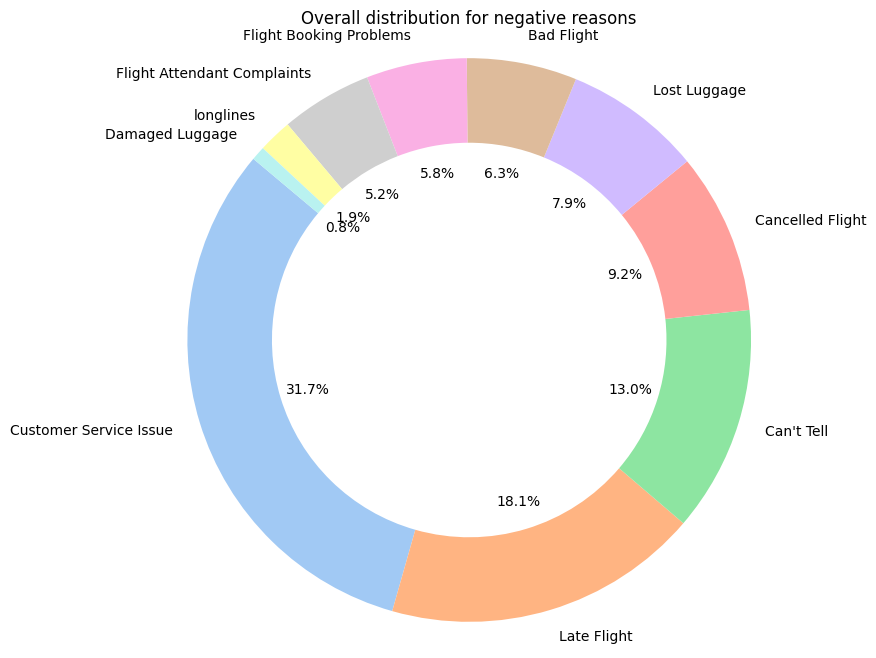

In [6]:
# Calculate the value counts for each negative reason
value_counts = df['negativereason'].value_counts()

# Create a donut-like pie chart using matplotlib and seaborn
plt.figure(figsize=(8, 8))
labels = value_counts.index
values = value_counts.values
colors = sns.color_palette('pastel')[0:len(labels)]  # Use pastel colors for the chart
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Overall distribution for negative reasons')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is drawn as a circle.
plt.show()

## Data clearing and preprocessing of Text

In [7]:
corpus = []
ps=PorterStemmer()
for i in range(len(df)):
    # Removing special characters from text(message)
    review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    
    # Converting entire text into lower case
    review = review.lower()
    
    # Splitting our text into words
    review = review.split()
    
    # Stemming and removing stopwords
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    
    # Joining all the words into a comple text
    review = ' '.join(review)
    
    # Appending each text into the list corpus
    corpus.append(review)                                    

In [8]:
# Creating the Bag of Words model
cv = TfidfVectorizer(ngram_range=(1,2), max_features=500000)

In [9]:
# We will use X as independent feature section
X = cv.fit_transform(corpus)
# We will use y as dependent feature section
y=df['airline_sentiment']

In [10]:
print('No. of feature_words: ', len(cv.get_feature_names_out()))

No. of feature_words:  91436


In [11]:
# Creating a pickle file for the TfidfVectorizer
with open('cv-transform.pkl', 'wb') as f:
    pickle.dump(cv, f)

# Model Training

In [12]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [13]:
# Training using three algorithms, let's see which will give us better result
model1=LogisticRegression()
model2=BernoulliNB()
model3=LinearSVC()
model=[model1, model2, model3]

In [14]:
i = 0
for algo in model:
  i += 1
  print("M-O-D-E-L :",i)
  algo.fit(X_train, y_train)
  y_pred=algo.predict(X_test)
  # Checking the accuracy
  print("Confusion matrix : \n",confusion_matrix(y_pred,y_test))
  print("Accuracy score : ",accuracy_score(y_pred,y_test))
  print("Classification Report : \n",classification_report(y_pred,y_test))
  print("-----------------------------------------------------------\n")

M-O-D-E-L : 1
Confusion matrix : 
 [[2694  532  285]
 [  77  351   81]
 [  17   36  319]]
Accuracy score :  0.7659380692167578
Classification Report : 
               precision    recall  f1-score   support

    negative       0.97      0.77      0.86      3511
     neutral       0.38      0.69      0.49       509
    positive       0.47      0.86      0.60       372

    accuracy                           0.77      4392
   macro avg       0.60      0.77      0.65      4392
weighted avg       0.86      0.77      0.79      4392

-----------------------------------------------------------

M-O-D-E-L : 2
Confusion matrix : 
 [[2780  850  670]
 [   8   69   13]
 [   0    0    2]]
Accuracy score :  0.6491347905282332
Classification Report : 
               precision    recall  f1-score   support

    negative       1.00      0.65      0.78      4300
     neutral       0.08      0.77      0.14        90
    positive       0.00      1.00      0.01         2

    accuracy                      

#### Based on the metrics, Model 3 appears to be the best performer among the three models. It has the highest accuracy score (0.782) and generally higher precision, recall, and F1-scores for all three classes compared to Model 1 and Model 2. Model 1 also performs reasonably well with a good accuracy score (0.766) and balanced precision and recall for each class.

#### On the other hand, Model 2 shows relatively low accuracy (0.649) and poor precision and F1-scores for all classes, except for "negative" where it has a relatively higher recall. This suggests that Model 2 may have difficulties in correctly classifying the data points for most classes.

#### Overall, Model 3 is the recommended choice for its better overall performance across various metrics.

In [15]:
# Creating a pickle file for our model 3 i.e. LinearSVC
with open("tweetmodel.pkl","wb") as file:
  pickle.dump(model3,file)

## Thank You 😊